In [5]:
import praw
import pandas as pd

reddit = praw.Reddit(
   client_id = 'dDLYtb63PNuVu9Z2RrT6DQ',
   client_secret = 'P27TNPCXiNovFkGTDg7PV3dO0lJ_xg',
   user_agent = 'praw')

# This function returns a Pandas dataframe
# containing reddit post comments, given its id
def getComments(id):
    submission = reddit.submission(id)
    pandas_list = []
    commentsList = submission.comments.list()
    # 'limit' parameter can be increased 
    # in order to expand more comments
    submission.comments.replace_more(limit=64)
    print(len(commentsList))
    i = 0
    for c in commentsList:
        if isinstance(c, praw.models.MoreComments):
            continue
        commentText = c.body
        if commentText in {'[deleted]', '[removed]'}:
            continue
        pandas_list.append([i, commentText])
        i+=1
    df = pd.DataFrame(pandas_list)
    df.columns = ['id', 'description']
    return df

In [6]:
corpus = getComments('1detli')

print(corpus.shape)
corpus.head()

902
(452, 2)


,id,description
0,0,My father passed away last year. One item he ...
1,1,My mom told me this story the other day and it...
2,2,"When I was 15, my mother and I were standing i..."
3,3,Scariest moment of my life happened while my f...
4,4,I saw a 'shadow person' once.\n\nI didn't know...


In [7]:
print('First spooky story : ',corpus.loc[0,'description'])

First spooky story :  My father passed away last year.  One item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather.  For years he had this shotgun stashed in the attic.  After he passed, I had gone in the attic to look for it, only to find that it wasn't there.

A few months later, I had a dream in which I was talking to him and I asked him where he had put the shotgun.  He told me it was in the closet of a spare bedroom.  I called my mother and had her check, and sure enough that's where it was.

Now it's completely possible that my father had told me that when he was alive, and the dream was little more than a memory, but I certainly don't recall that being the case.


In [8]:
from bs4 import BeautifulSoup
import re

# Remove HTML elements
corpus['clean_description'] = corpus['description'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

# Remove special characters and numbers
corpus['clean_description'] = corpus['clean_description'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))

print('Description cleaned of the first product : ', corpus.loc[0, 'clean_description'])

Description cleaned of the first product :  My father passed away last year  One item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather  For years he had this shotgun stashed in the attic  After he passed I had gone in the attic to look for it only to find that it wasnt there

A few months later I had a dream in which I was talking to him and I asked him where he had put the shotgun  He told me it was in the closet of a spare bedroom  I called my mother and had her check and sure enough thats where it was

Now its completely possible that my father had told me that when he was alive and the dream was little more than a memory but I certainly dont recall that being the case


In [9]:
# Lowercase
# CODE_START
corpus['clean_description'] = corpus['clean_description'].str.lower()
# CODE_END
print('First story lower-cased : ',corpus.loc[0,'clean_description'])

First story lower-cased :  my father passed away last year  one item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather  for years he had this shotgun stashed in the attic  after he passed i had gone in the attic to look for it only to find that it wasnt there

a few months later i had a dream in which i was talking to him and i asked him where he had put the shotgun  he told me it was in the closet of a spare bedroom  i called my mother and had her check and sure enough thats where it was

now its completely possible that my father had told me that when he was alive and the dream was little more than a memory but i certainly dont recall that being the case


In [10]:
## Tokenize the cleaned description
# CODE_START
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

corpus['clean_tokens'] = corpus['clean_description'].apply(word_tokenize)
# CODE_END
corpus.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kleot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,description,clean_description,clean_tokens
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[my, father, passed, away, last, year, one, it..."
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[my, mom, told, me, this, story, the, other, d..."
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[when, i, was, my, mother, and, i, were, stand..."
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scariest, moment, of, my, life, happened, whi..."
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[i, saw, a, shadow, person, once, i, didnt, kn..."


In [11]:
# Remove stop words
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import nltk

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    lemmatized = []
    # Iterate over each token and its POS tag
    for token, tag in pos_tag(tokens):
        # Determine POS for lemmatization
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        # Lemmatize token and add to the list
        lemmatized.append(lemmatizer.lemmatize(token, pos))
    return lemmatized

# Lemmatize and remove stop words
corpus['clean_tokens'] = corpus['clean_tokens'].apply(
    lambda tokens: [token for token in lemmatize(tokens) if token not in stop_words]
)
corpus.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kleot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kleot\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kleot\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,id,description,clean_description,clean_tokens
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[father, pass, away, last, year, one, item, al..."
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[mom, tell, story, day, freak, fuck, old, sist..."
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[mother, stand, kitchen, talk, rack, wall, hol..."
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scary, moment, life, happen, friend, camp, ea..."
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[saw, shadow, person, didnt, know, thats, call..."


In [12]:
# Put back tokens into one single string
# CODE_START
corpus["clean_document"] = corpus["clean_tokens"].apply(lambda tokens: " ".join(tokens))
# CODE_END
corpus.head()

,id,description,clean_description,clean_tokens,clean_document
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[father, pass, away, last, year, one, item, al...",father pass away last year one item always say...
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[mom, tell, story, day, freak, fuck, old, sist...",mom tell story day freak fuck old sister littl...
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[mother, stand, kitchen, talk, rack, wall, hol...",mother stand kitchen talk rack wall hold key f...
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scary, moment, life, happen, friend, camp, ea...",scary moment life happen friend camp eastern c...
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[saw, shadow, person, didnt, know, thats, call...",saw shadow person didnt know thats call much l...


### TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus["clean_document"])

# X is a generator. We can transform that as an array
X = X.toarray()
print(X.shape)

(452, 3928)


### LSA

In [14]:
from sklearn.decomposition import TruncatedSVD
# Train SVD model
svd_model = TruncatedSVD(n_components=12) # We test on 12 topics
lsa = svd_model.fit_transform(X)
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_" + str(i) for i in range(lsa.shape[1])])
topic_encoded_df["documents"] = corpus['clean_description']
topic_encoded_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents
0,0.204727,-0.054174,0.160326,-0.023881,0.086861,-0.021907,-0.023472,-0.130525,0.070103,0.015085,-0.023038,0.013824,my father passed away last year one item he a...
1,0.252253,-0.024900,0.287431,-0.068806,-0.157520,0.028022,0.022368,-0.098908,-0.007707,-0.021172,-0.169355,-0.160646,my mom told me this story the other day and it...
2,0.178823,-0.015867,-0.053465,-0.109630,-0.001447,0.044238,-0.035296,-0.078425,-0.049903,-0.097254,0.041589,0.006726,when i was my mother and i were standing in t...
3,0.278825,-0.082395,-0.112053,0.067212,-0.097601,-0.025346,0.029939,0.023113,0.096078,0.203746,0.210237,-0.174728,scariest moment of my life happened while my f...
4,0.386838,0.002751,-0.129179,0.003222,-0.025733,-0.019307,0.018848,-0.066262,-0.055732,0.019440,0.094794,0.016587,i saw a shadow person once\n\ni didnt know tha...


In [15]:
import numpy as np

def extract_main_topics(x):
    """
    Return the main topic for each document. The main topic is the one that has the maximum value for each line
    """
    # Find the index of the maximum value in the row
    main_topic = np.argmax(x.values)
    return main_topic

# Initialize column main_topics with 0
topic_encoded_df.loc[:, 'main_topic'] = 0

for i, row in topic_encoded_df.iloc[:, :-2].iterrows():
    topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)

topic_encoded_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents,main_topic
0,0.204727,-0.054174,0.160326,-0.023881,0.086861,-0.021907,-0.023472,-0.130525,0.070103,0.015085,-0.023038,0.013824,my father passed away last year one item he a...,0
1,0.252253,-0.024900,0.287431,-0.068806,-0.157520,0.028022,0.022368,-0.098908,-0.007707,-0.021172,-0.169355,-0.160646,my mom told me this story the other day and it...,2
2,0.178823,-0.015867,-0.053465,-0.109630,-0.001447,0.044238,-0.035296,-0.078425,-0.049903,-0.097254,0.041589,0.006726,when i was my mother and i were standing in t...,0
3,0.278825,-0.082395,-0.112053,0.067212,-0.097601,-0.025346,0.029939,0.023113,0.096078,0.203746,0.210237,-0.174728,scariest moment of my life happened while my f...,0
4,0.386838,0.002751,-0.129179,0.003222,-0.025733,-0.019307,0.018848,-0.066262,-0.055732,0.019440,0.094794,0.016587,i saw a shadow person once\n\ni didnt know tha...,0


In [16]:
topic_encoded_df['main_topic'].value_counts()

main_topic
0     226
3      38
1      29
9      27
7      22
4      21
2      20
6      19
10     18
5      14
8      11
11      7
Name: count, dtype: int64

In [17]:
# Create DataFrame containing the description of each topic in terms of the words in the vocabulary
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names_out(), 
                                  index = ['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis = 1)

# Each word is map with a score of relevance for each topic
topics_description.head()

,aaaand,aaand,abandon,abduct,abduction,ability,abject,able,aboard,abominably,...,youll,young,youre,youth,yukon,zag,zig,zimbabwe,zinc,zone
topic_0,0.000794,0.000701,0.006167,0.001987,0.002403,0.006891,0.002333,0.023438,0.001110,0.000816,...,0.005484,0.049223,0.028897,0.001625,0.003012,0.002218,0.002218,0.001220,0.001948,0.002840
topic_1,0.000785,0.000488,0.002428,0.001445,0.001379,0.034404,0.000880,0.007090,0.000678,0.000269,...,0.003005,0.023805,0.056040,0.000941,0.002297,0.002019,0.002019,0.000371,0.000065,0.001587
topic_2,0.000044,0.000032,0.003379,0.001693,0.003550,0.000441,0.001818,0.013066,0.000383,0.000882,...,0.002002,0.014898,0.006908,0.000740,0.000439,0.001900,0.001900,0.000741,0.002587,0.003385
topic_3,0.000393,0.003925,0.006504,0.002791,0.009470,0.004297,0.023243,0.019707,0.000060,0.000415,...,0.005347,0.025558,0.021976,0.001564,0.006325,0.001218,0.001218,0.000025,0.000101,0.001012
topic_4,0.002020,0.000303,0.011272,0.007248,0.007349,0.023791,0.009785,0.000587,0.001157,0.000449,...,0.005242,0.026755,0.103856,0.003044,0.005750,0.001993,0.001993,0.001154,0.000652,0.000885


In [18]:
# Loop over each topic and print the 5 most important words

# CODE_START
for i, row in topics_description.iterrows():
	print(f"Topic {i}: {row.nlargest(5).index.tolist()}")

# CODE_END

Topic topic_0: ['like', 'time', 'say', 'house', 'tell']
Topic topic_1: ['ghost', 'nice', 'thats', 'mean', 'asshole']
Topic topic_2: ['say', 'door', 'mom', 'open', 'die']
Topic topic_3: ['story', 'fuck', 'house', 'door', 'thats']
Topic topic_4: ['dream', 'fuck', 'happen', 'story', 'dude']
Topic topic_5: ['alien', 'im', 'say', 'friend', 'dude']
Topic topic_6: ['shit', 'love', 'thats', 'grandma', 'story']
Topic topic_7: ['time', 'alien', 'dead', 'grandma', 'dream']
Topic topic_8: ['dude', 'fuck', 'like', 'time', 'im']
Topic topic_9: ['nope', 'fuck', 'grandma', 'door', 'im']
Topic topic_10: ['friend', 'grandma', 'story', 'alien', 'nope']
Topic topic_11: ['nope', 'man', 'mom', 'scary', 'camper']


-------------------------

TOPIC  topic_0


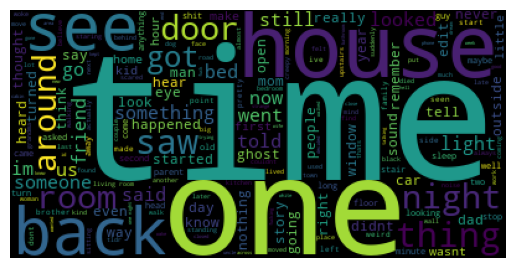


-------------------------

TOPIC  topic_1


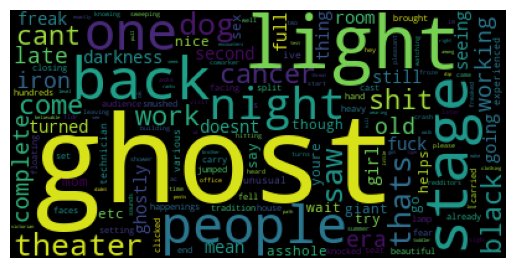


-------------------------

TOPIC  topic_2


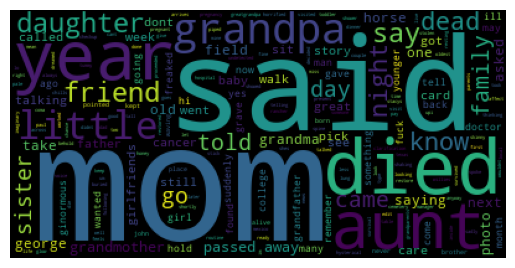


-------------------------

TOPIC  topic_3


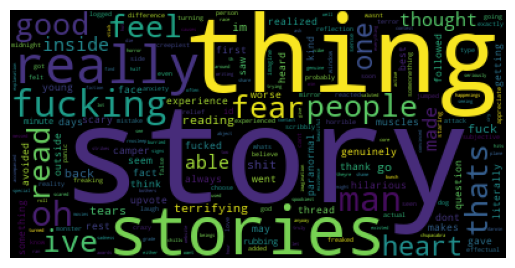


-------------------------

TOPIC  topic_4


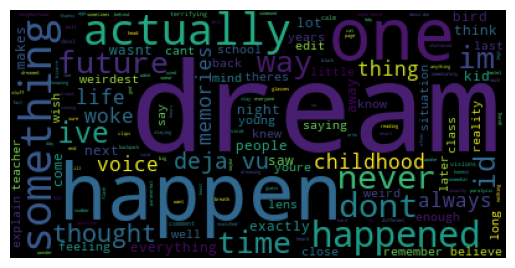


-------------------------

TOPIC  topic_5


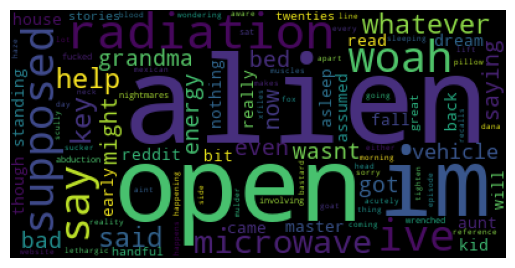


-------------------------

TOPIC  topic_6


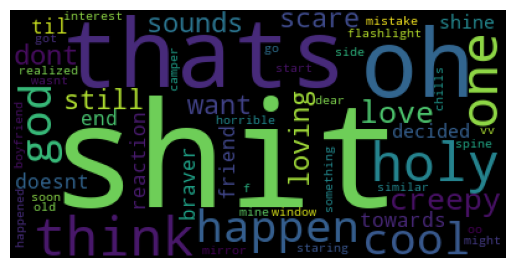


-------------------------

TOPIC  topic_7


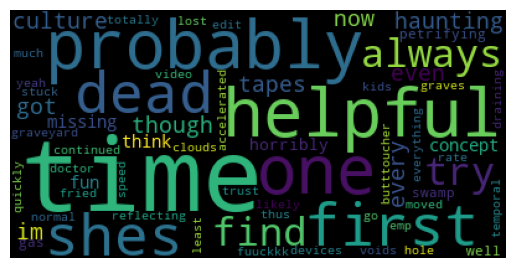


-------------------------

TOPIC  topic_8


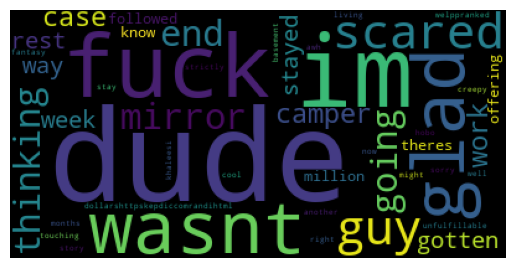


-------------------------

TOPIC  topic_9


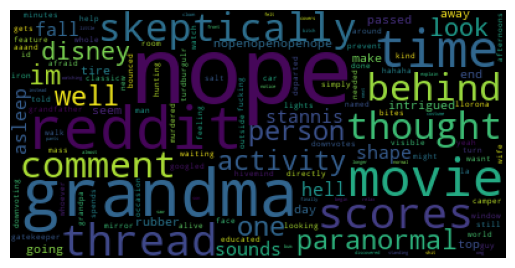


-------------------------

TOPIC  topic_10


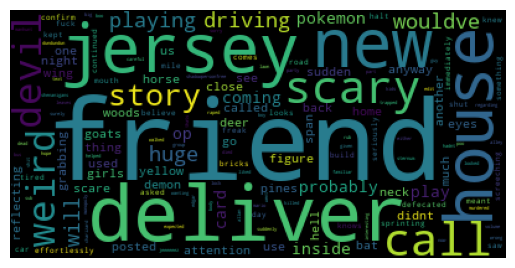


-------------------------

TOPIC  topic_11


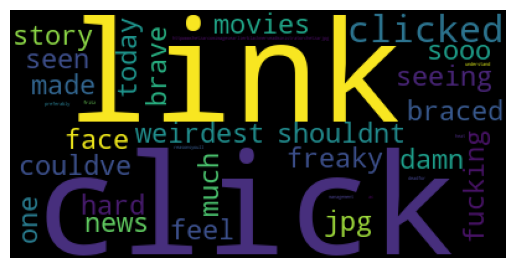

In [20]:
import wordcloud
import matplotlib.pyplot as plt

# Loop over each topic and create wordcloud from documents that are related to this main topic
wd = wordcloud.WordCloud()

for t in cols:
    print('-------------------------')
    print()
    print('TOPIC ', t)
    
    # Extract the numeric index from the topic string
    topic_index = int(t.split('_')[1])
    
    # Handle topics that are not main topics for any document in the corpus
    if (topic_encoded_df['main_topic'] == topic_index).any() == False:
        print('cannot create wordcloud for this topic')
        continue
    
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic'] == topic_index, 'documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()
    
    print()

## Task 1. Use doc2vec instead of TF-IDF.

In [21]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Prepare the data for doc2vec
tagged_data = [TaggedDocument(words=row.split(), tags=[str(index)]) for index, row in enumerate(corpus["clean_document"])]

# Train the Doc2Vec model
doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4, epochs=20)

# Generate document vectors
X = [doc2vec_model.dv[str(i)] for i in range(len(tagged_data))]
X = np.array(X)

print(X.shape)

(452, 100)


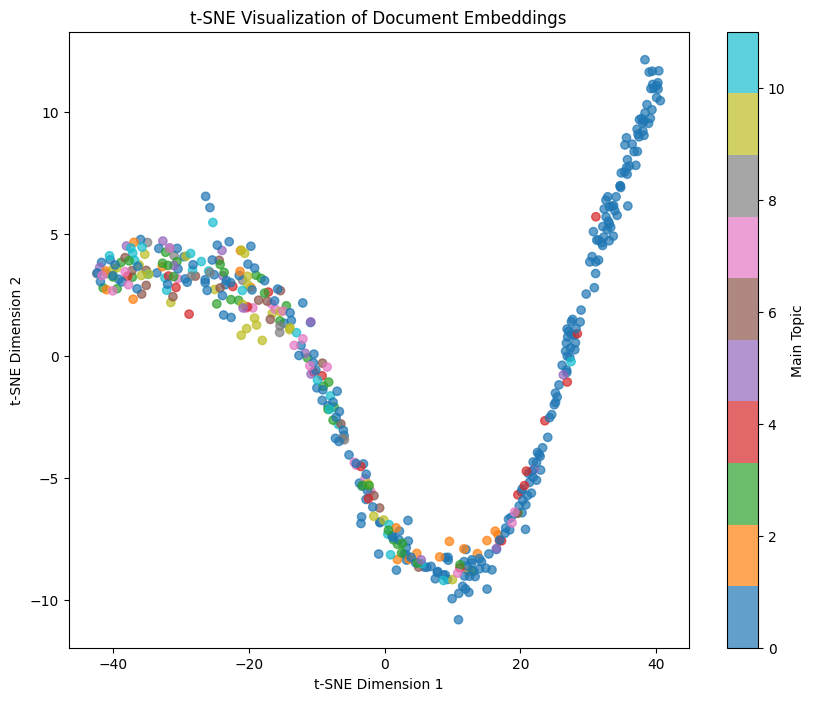

In [22]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=topic_encoded_df['main_topic'], cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Main Topic')
plt.title('t-SNE Visualization of Document Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()